# I] Import and options


In [105]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'xtick.labelsize':20, 
                            'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [106]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [107]:
#download data, Elaspsed column
path = output_file_directory + 'ATG7/MEF_Huh7/Proliferation/data_for_input/'

dmem_30h = []
starvation_30h = []

for file in "exp1.csv", "exp2.csv", "exp3.csv":
    
    df = pandas.read_csv(path+"df_dmem_30h_"+file, sep = ",")
    dmem_30h.append(df)
  
    df = pandas.read_csv(path+"df_starvation_30h_"+file, sep = ",")
    starvation_30h.append(df)

df_dmem_30h = pandas.concat(dmem_30h)
df_starvation_30h = pandas.concat(starvation_30h)

df_starvation_30h

,Elapsed,samples,Medium,Drug,value,experiment
0,30.0,Normal,Starvation,DMSO,54.535288,exp1
1,30.0,EV,Starvation,DMSO,60.040093,exp1
2,30.0,WT1,Starvation,DMSO,59.798684,exp1
3,30.0,dVSR(1),Starvation,DMSO,58.760297,exp1
4,30.0,WT2,Starvation,DMSO,58.320241,exp1
5,30.0,dVSR(2),Starvation,DMSO,57.786242,exp1
6,30.0,Normal,Starvation,BAF,51.370401,exp1
7,30.0,EV,Starvation,BAF,51.421584,exp1
8,30.0,WT1,Starvation,BAF,53.242228,exp1
9,30.0,dVSR(1),Starvation,BAF,52.837993,exp1


In [108]:
for df in df_dmem_30h, df_starvation_30h:
    df.drop(['Medium', 'Elapsed', 'experiment'], axis =1, inplace=True)

df_dmem_30h.head()

,samples,Drug,value
0,Normal,DMSO,61.041357
1,EV,DMSO,74.381289
2,WT1,DMSO,71.680724
3,dVSR(1),DMSO,68.598697
4,WT2,DMSO,63.636021


## All condition, BAF and Starvation

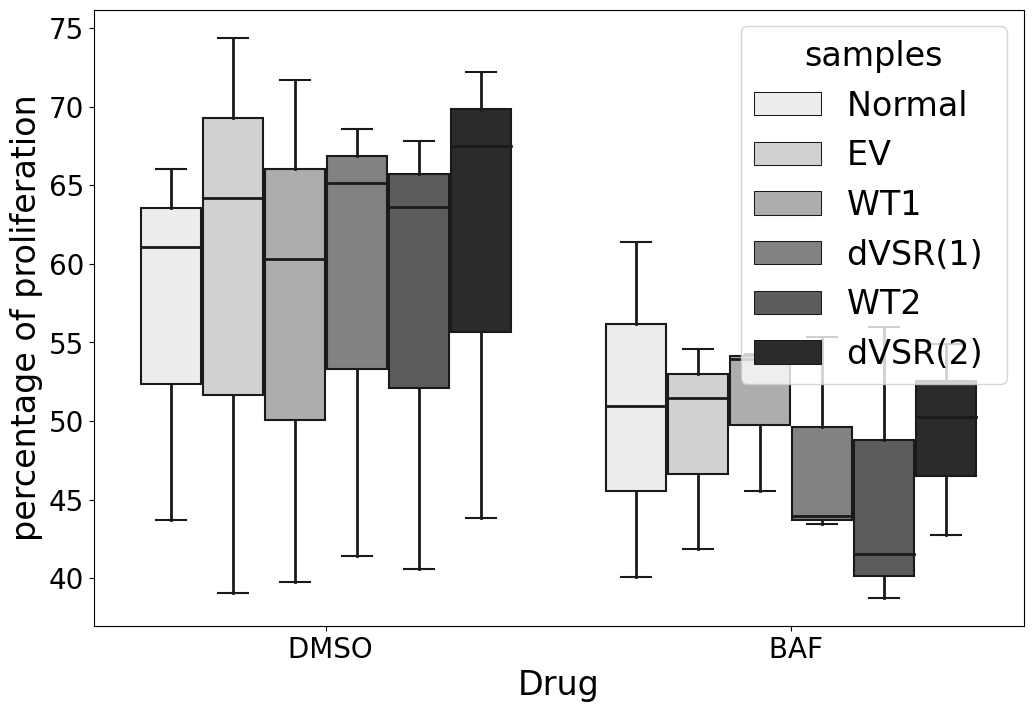

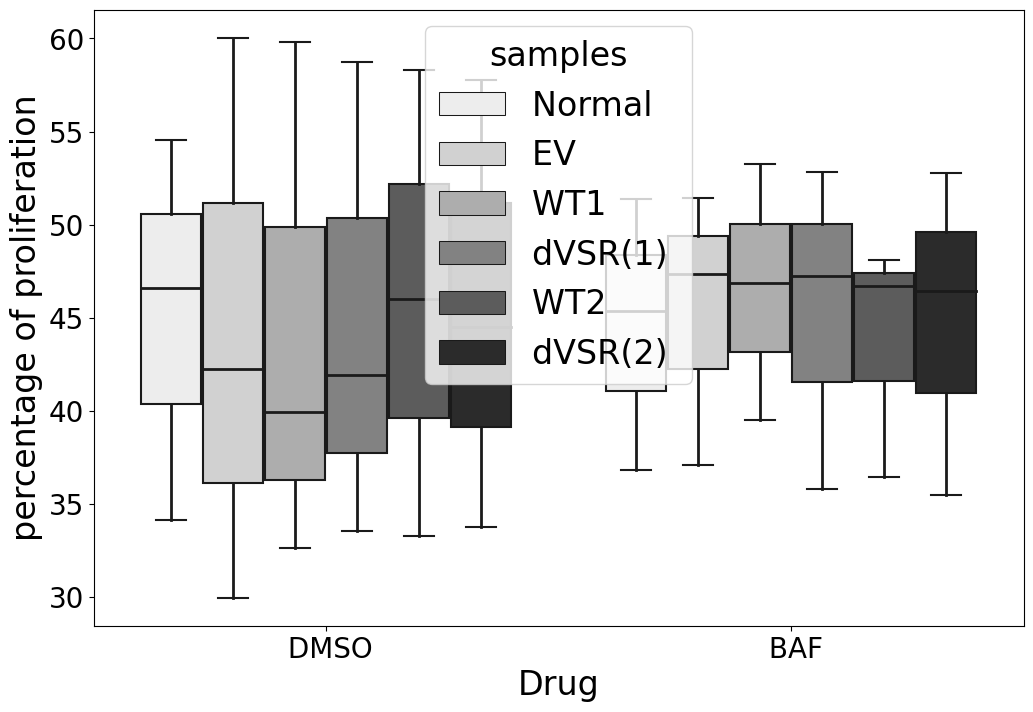

In [109]:
medium = 'dmem', 'starvation'
dfs = df_dmem_30h, df_starvation_30h

for i in range(len(dfs)): 
    df = dfs[i]
    media = medium[i]
    
    plt.tight_layout()
    seaborn.boxplot(df, y = 'value', x = 'Drug', hue = 'samples', 
                    medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False, 
                    palette = 'Greys' )
    
    plt.ylabel('percentage of proliferation')

    
    path2 = output_file_directory + 'ATG7/MEF_Huh7/Proliferation/'
    name = f'recap_boxplot_proliferation_mefs_{media}'  
    
    plt.savefig(path2+name+'_article.svg')
    plt.show()

## No BAF

In [110]:
df_dmem_30h_nobaf = df_dmem_30h[df_dmem_30h.Drug == ' DMSO']
df_starvation_30h_nobaf = df_starvation_30h[df_starvation_30h.Drug == ' DMSO']

dfs = df_dmem_30h, df_starvation_30h
for df in dfs:
    df.reset_index(drop = True, inplace = True)

df_starvation_30h_nobaf.head()

,samples,Drug,value
0,Normal,DMSO,54.535288
1,EV,DMSO,60.040093
2,WT1,DMSO,59.798684
3,dVSR(1),DMSO,58.760297
4,WT2,DMSO,58.320241


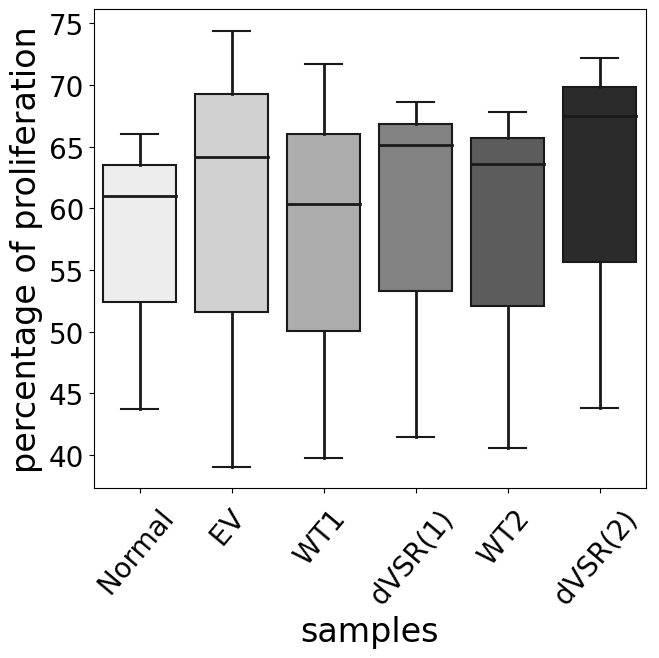

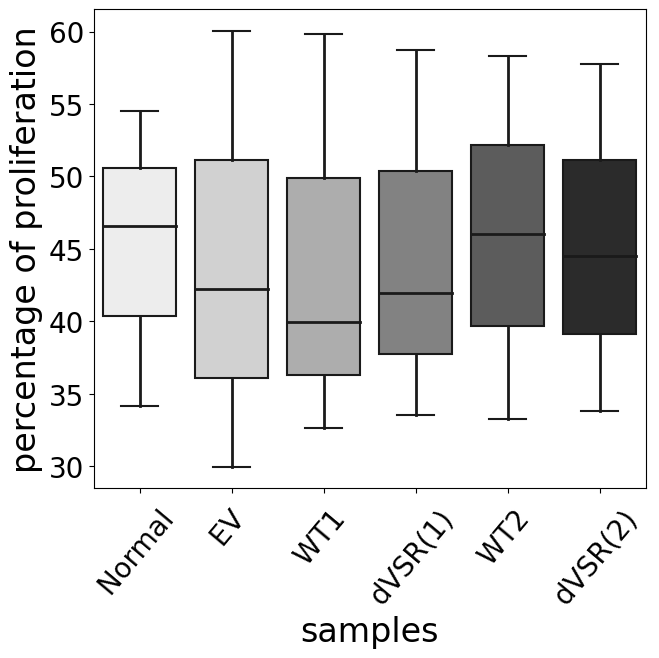

In [111]:
medium = 'dmem', 'starvation'
dfs = df_dmem_30h_nobaf, df_starvation_30h_nobaf

for i in range(len(dfs)): 
    df = dfs[i]
    media = medium[i]
    
    plt.subplots(figsize=(7,6))
    plt.tight_layout()
    seaborn.boxplot(df, y = 'value', x = 'samples', 
                    medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False, 
                    palette = 'Greys' )
    
    plt.ylabel('percentage of proliferation')
    plt.xticks(rotation = 50)

    
    path2 = output_file_directory + 'ATG7/MEF_Huh7/Proliferation/'
    name = f'recap_boxplot_proliferation_mefs_nobaf_{media}'  
    
    plt.savefig(path2+name+'_article.svg')
    plt.show()

## Stats

In [135]:
pvalue[0]

0.8637122787432432

In [139]:
#Statistics T-test for the means of two independent samples
dfs = df_dmem_30h_nobaf, df_starvation_30h_nobaf
medium = 'dmem', 'starvation'

for i in range(len(dfs)) :
    df = dfs[i]
    media = medium[i]
    
    df.sort_values('samples', inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    print(media.upper())
    # Stats of all compare to MEF WT
    normal_label = df.iloc[0]['samples']
    ev_label = df.iloc[3]['samples']
    iso1_label = df.loc[6]['samples']
    mut1_label = df.loc[9]['samples']
    iso2_label = df.iloc[12]['samples']
    mut2_label = df.loc[15]['samples']
    
    df_ctl = df.iloc[:3, 2:].astype(float)
    df_ev = df.iloc[3:6, 2:].astype(float)
    df_wt1 = df.iloc[6:9, 2:].astype(float)
    df_mut1 = df.iloc[9:12, 2:].astype(float)
    df_wt2 = df.iloc[12:15, 2:].astype(float)
    df_mut2 = df.iloc[15:, 2:].astype(float)
               
    ### normal vs EV
    statistic, pvalue = scipy.stats.ttest_ind(df_ctl, df_ev)
    print("the pvalue between", normal_label, "and", ev_label,"is", "{:.5E}".format(pvalue[0]))
    ### EV vs ATG7(1)
    statistic, pvalue = scipy.stats.ttest_ind(df_ev, df_wt1)
    print("the pvalue between", ev_label, "and", iso1_label,"is", "{:.5E}".format(pvalue[0]))
    ### ATG7(1) vs VSR(1)
    statistic, pvalue = scipy.stats.ttest_ind(df_wt1, df_mut1)
    print("the pvalue between", iso1_label, "and", mut1_label,"is", "{:.5E}".format(pvalue[0]))
    ### EV vs ATG7(2)
    statistic, pvalue = scipy.stats.ttest_ind(df_ev, df_wt2)
    print("the pvalue between", ev_label, "and", iso2_label,"is", "{:.5E}".format(pvalue[0]))
    ### ATG7(2) vs VSR(2)
    statistic, pvalue = scipy.stats.ttest_ind(df_wt2, df_mut2)
    print("the pvalue between", iso2_label, "and", mut2_label,"is", "{:.5E}".format(pvalue[0]))
    ### ATG7(1) vs ATG7(2)
    statistic, pvalue = scipy.stats.ttest_ind(df_wt1, df_wt2)
    print("the pvalue between", iso1_label, "and", iso2_label,"is", "{:.5E}".format(pvalue[0]))
    print('\n')

DMEM
the pvalue between EV  and Normal  is 8.63712E-01
the pvalue between Normal  and WT1  is 9.78438E-01
the pvalue between WT1  and WT2  is 9.95387E-01
the pvalue between Normal  and dVSR(1)  is 9.00016E-01
the pvalue between dVSR(1)  and dVSR(2)  is 8.31990E-01
the pvalue between WT1  and dVSR(1)  is 9.33389E-01


STARVATION
the pvalue between EV  and Normal  is 9.28652E-01
the pvalue between Normal  and WT1  is 9.28008E-01
the pvalue between WT1  and WT2  is 8.80168E-01
the pvalue between Normal  and dVSR(1)  is 9.72998E-01
the pvalue between dVSR(1)  and dVSR(2)  is 9.54471E-01
the pvalue between WT1  and dVSR(1)  is 9.57400E-01




C:\Users\kja11\AppData\Local\Temp\ipykernel_4036\2954057850.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('samples', inplace = True)
